# Generalized in a way that it is not limited to LSTM anymore!
# This file can be deleted!

# Test Environment

In [19]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
import Models.LSTM.models as models
import myLibrary as mL
from dataset_container import Experiment
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle

# Get Data

In [20]:
import ipywidgets as widgets
def build_UI():
    #STATIONS -----------------------------------------------------------------------------------
    # create a list of checkbox widgets for each station
    stations = []
    for station in mL.cleaned_stations_GOM:
        checkbox = widgets.Checkbox(value=False, description=station, disabled=False, indent=False)
        stations.append(checkbox)

    # create a GridBox layout container with two columns
    global stations_grid
    stations_grid = widgets.GridBox(stations, layout=widgets.Layout(grid_template_columns="repeat(3, 300px)"))

    # wrap the GridBox inside a Box layout container with a fixed height and scrollable overflow
    stations_box = widgets.Box(children=[stations_grid], layout=widgets.Layout(height="200px", overflow="scroll"))

    # display the checkboxes
    print("STATIONS")
    display(stations_box)

    #Years --------------------------------------------------------------------------------------
    # create a range slider widget for selecting a time range
    global time_range_slider
    time_range_slider = widgets.SelectionRangeSlider(
        options=list(range(1970, 2023)),  # range of years to select from
        index=(51, 52),  # initial range selected (1970-2023)
        description='Time Range:',
        orientation='horizontal',
        layout={'width': '500px'}
    )

    # display the range slider widget
    display(time_range_slider)

    #NaN_Theshold--------------------------------------------------------------------------------
    # create a FloatSlider widget for a value between 0 and 1
    print("NaN-Threshold:")
    global nan_threshold_slider
    nan_threshold_slider = widgets.FloatSlider(
        value=0.5,
        min=0,
        max=1,
        step=0.01,
        description='',
        readout_format='.2f',
        orientation='horizontal',
        layout={'width': '500px'}
    )

    # display the FloatSlider widget
    display(nan_threshold_slider)

    #Features--------------------------------------------------------------------------------
    features = []
    for feature in ["WDIR", "WSPD", "WVHT", "APD", "MWD", "PRES", "ATMP", "WTMP", "DEWP"]:
        checkbox = widgets.Checkbox(value=False, description=feature, disabled=False, indent=False)
        features.append(checkbox)

    print("Features:")
    global feature_container
    feature_container = widgets.HBox(features)
    display(feature_container)

    #ERA5------------------------------------------------------------------------------------
    global era5_checkbox
    era5_checkbox = widgets.Checkbox(value=False, description="Add ERA5 model data", disabled=False, indent=False)
    print("Model Data:")
    display(era5_checkbox)
    #STATIONARY_SHIFT -----------------------------------------------------------------------
    global stationaryShift_widget
    stationaryShift_widget = widgets.BoundedIntText(
        value=1,
        min=0,
        max=10,
        step=1,
        description='',
        disabled=False,
    )
    print("Stationary Shilft: ")
    display(stationaryShift_widget)
    # LAG ----------------------------------------------------------------------------------------
    global lag_widget
    lag_widget = widgets.BoundedIntText(
        value=1,
        min=0,
        max=10,
        step=1,
        description='',
        disabled=False,
    )
    print("LAG:")
    display(lag_widget)

    # Test Hours-------------------------------------------------------------------------------
    global test_hours_widget
    test_hours_widget = widgets.IntSlider(
        value=24,
        min=0,
        max=1000,
        step=1,
        description='Test Hours:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
    )

    # display the range slider widget
    display(test_hours_widget)
    #print("(1 Week = 168h)")

    # Test Hours-------------------------------------------------------------------------------
    global models_widget
    models_list = list(models.model_dictionary.keys())
    models_widget = widgets.Select(
        options=models_list,
        value=models_list[0],
        # rows=10,
        description='Model:',
        disabled=False
    )
    display(models_widget)


build_UI()

STATIONS


Box(children=(GridBox(children=(Checkbox(value=False, description='41117', indent=False), Checkbox(value=False…

SelectionRangeSlider(description='Time Range:', index=(51, 52), layout=Layout(width='500px'), options=(1970, 1…

NaN-Threshold:


FloatSlider(value=0.5, layout=Layout(width='500px'), max=1.0, step=0.01)

Features:


Model Data:


Checkbox(value=False, description='Add ERA5 model data', indent=False)

Stationary Shilft: 


BoundedIntText(value=1, max=10)

LAG:


BoundedIntText(value=1, max=10)

IntSlider(value=24, continuous_update=False, description='Test Hours:', max=1000)

Select(description='Model:', options=('lstm_0', 'lstm_1'), value='lstm_0')

In [21]:
STATIONS = [checkbox.description for checkbox in stations_grid.children if checkbox.value]

# get the selected time range
start_year, end_year = time_range_slider.value
YEARS = [str(year) for year in range(start_year, end_year + 1)]
NAN_THRESHOLD = nan_threshold_slider.value
FEATURES =  [checkbox.description for checkbox in feature_container.children if checkbox.value]
ERA5 = era5_checkbox.value
STATIONARY_SHIFT = stationaryShift_widget.value
LAG = lag_widget.value
N_TEST_HOURS = test_hours_widget.value
MODEL_NAME = models_widget.value

print(f"Stations: {STATIONS}")
print(f"Years: {YEARS}")
print(f"NaN_Threshold: {NAN_THRESHOLD}")
print(f"Features: {FEATURES}")
print(f"ERA5: {ERA5}, Stationary Shift: {STATIONARY_SHIFT}, lag: {LAG}, Test-Hours:{N_TEST_HOURS}")
print(f"Model: {MODEL_NAME}")

Stations: ['41117']
Years: ['2021', '2022']
NaN_Threshold: 0.5
Features: ['WTMP']
ERA5: False, Stationary Shift: 1, lag: 1, Test-Hours:24
Model: lstm_0


In [22]:
data = mL.get_data(
    stations=STATIONS,
    years=YEARS,
    nan_threshold=NAN_THRESHOLD,
    features=FEATURES,
    #features=None,
    era5=ERA5
    )

data

Started with  2021 . Previous year took:   0.00043320655822753906 seconds
from disc
Started with  2022 . Previous year took:   3.1666271686553955 seconds
from disc
Finished downloading - now merging it together!


,WTMP_41117
timestamp,
2021-01-01 00:00:00,27.8
2021-01-01 01:00:00,27.8
2021-01-01 02:00:00,27.8
2021-01-01 03:00:00,27.8
2021-01-01 04:00:00,27.8
...,...
2022-12-31 19:00:00,17.4
2022-12-31 20:00:00,17.4
2022-12-31 21:00:00,17.4


## 1. Make data stationary

In [23]:
STATIONARY = True #Set Flag for report
data_stationary = mL.data_to_stationary(data, n = STATIONARY_SHIFT)
data_stationary.head()

,WTMP_41117
timestamp,
2021-01-01 01:00:00,0.0
2021-01-01 02:00:00,0.0
2021-01-01 03:00:00,0.0
2021-01-01 04:00:00,0.0
2021-01-01 05:00:00,0.0


## 2. Transform to supervised problem

In [24]:
data_supervised = mL.data_to_supervised(data_stationary)
data_supervised.head()

,WTMP_41117(t-1),WTMP_41117(t)
timestamp,,
2021-01-01 02:00:00,0.0,0.0
2021-01-01 03:00:00,0.0,0.0
2021-01-01 04:00:00,0.0,0.0
2021-01-01 05:00:00,0.0,0.0
2021-01-01 06:00:00,0.0,0.0


## train test split

In [25]:
train_X, train_y, test_X, test_y = mL.train_test_split(data_supervised, N_TEST_HOURS)
print("Shapes: ", train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Shapes:  (17350, 1, 1) (17350, 1) (168, 1, 1) (168, 1)


## Normalize the data

In [26]:
# Scale the data
NORMALIZED = True   #set flag for report
train_X_scaled, train_y_scaled, test_X_scaled, test_y_scaled, SCALER = mL.scale_data(train_X,
                                                                                     train_y,
                                                                                     test_X,
                                                                                     test_y)

---
# Select Model

In [27]:
#model = models.lstm_0(train_X_scaled,train_y_scaled)
model = models.get_model(MODEL_NAME, train_X, train_y)
model.summary()

2023-04-28 17:02:15.437748: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


----
# One-Shot Forecasting

In [28]:
_ = model.predict(train_X_scaled, batch_size=1)

17350/17350 [==============================] - 6s 328us/step


In [29]:
output_cols = data.columns.tolist()
output_cols

['WTMP_41117']

In [30]:
yhat = model.predict(test_X_scaled)
yhat_unscaled = mL.invert_scaling(yhat, SCALER)
yhat_unscaled_df = pd.DataFrame(yhat_unscaled, columns=[name + "_pred" for name in output_cols])
yhat_unscaled_df.set_index(data.tail(len(yhat)).index, inplace=True)
yhat_unscaled_df

6/6 [==============================] - 0s 658us/step


,WTMP_41117_pred
timestamp,
2022-12-25 00:00:00,0.093889
2022-12-25 01:00:00,0.093889
2022-12-25 02:00:00,0.093889
2022-12-25 03:00:00,0.093889
2022-12-25 04:00:00,0.093889
...,...
2022-12-31 19:00:00,0.129981
2022-12-31 20:00:00,0.093889
2022-12-31 21:00:00,0.093889


In [31]:
evaluation_1 = data.tail(len(yhat)+1).copy()  #+1 since i need that value for de-differencing
evaluation_1

,WTMP_41117
timestamp,
2022-12-24 23:00:00,17.4
2022-12-25 00:00:00,17.4
2022-12-25 01:00:00,17.4
2022-12-25 02:00:00,17.4
2022-12-25 03:00:00,17.4
...,...
2022-12-31 19:00:00,17.4
2022-12-31 20:00:00,17.4
2022-12-31 21:00:00,17.4


In [32]:
for col in evaluation_1.columns:
    evaluation_1[f"{col}_pred"]= evaluation_1[col].shift(STATIONARY_SHIFT) + yhat_unscaled_df[f"{col}_pred"]

evaluation_1 = evaluation_1.iloc[STATIONARY_SHIFT:]  # remove first n entries since there is no delta value for them
evaluation_1

,WTMP_41117,WTMP_41117_pred
timestamp,,
2022-12-25 00:00:00,17.4,17.493889
2022-12-25 01:00:00,17.4,17.493889
2022-12-25 02:00:00,17.4,17.493889
2022-12-25 03:00:00,17.4,17.493889
2022-12-25 04:00:00,17.4,17.493889
...,...,...
2022-12-31 19:00:00,17.4,17.529981
2022-12-31 20:00:00,17.4,17.493889
2022-12-31 21:00:00,17.4,17.493889


In [33]:
wtmp_true = [col for col in evaluation_1.columns if col.startswith("WTMP")][0]

mae = mean_absolute_error(evaluation_1[wtmp_true], evaluation_1[f"{wtmp_true}_pred"])
mse = mean_squared_error(evaluation_1[wtmp_true], evaluation_1[f"{wtmp_true}_pred"])
print('MAE: ', mae)
print('MSE: ', mse)

MAE:  0.10453519801875288
MSE:  0.015453502744625234


<AxesSubplot:xlabel='timestamp'>

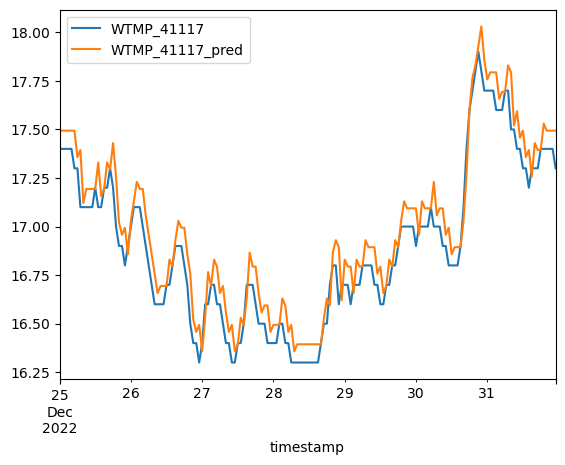

In [34]:
evaluation_1.plot(kind='line')

# 1-Week forecast

In [35]:
model.reset_states()
_ = model.predict(train_X_scaled, batch_size=1)

17350/17350 [==============================] - 6s 324us/step


In [36]:
# make a one-step forecast
# This function helps with reshaping.
def single_forecast(model, x):
    x = x.reshape(1, 1, len(x[0]))
    yhat = model.predict(x, verbose=0)
    return yhat

In [37]:
# Prepare data structure
prediction_2 = pd.DataFrame(test_y, columns=output_cols)
for col in output_cols:
    prediction_2[f"{col}_pred"] = 0

prediction_2

,WTMP_41117,WTMP_41117_pred
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
163,0.0,0
164,0.0,0
165,0.0,0
166,0.0,0


<AxesSubplot:>

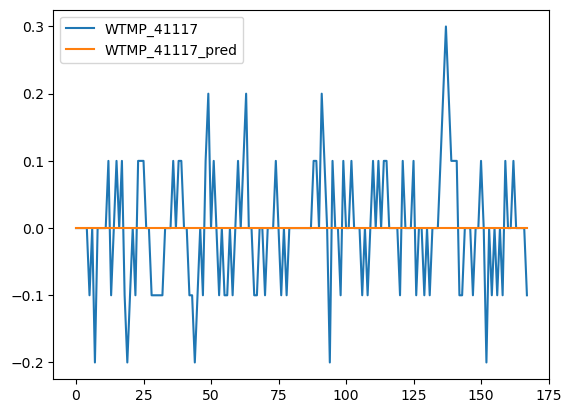

In [38]:
prediction_2.plot(kind='line')

In [39]:
#Forecast a whole week
prev_obs = test_X[0]

for i, row in prediction_2.iterrows():
    yhat = single_forecast(model, prev_obs)
    prev_obs = yhat

    #Mapping of array index and df column name
    for j, element in enumerate(output_cols):
        prediction_2.at[i, f"{element}_pred"] =yhat[0,j]

prediction_2

,WTMP_41117,WTMP_41117_pred
0,0.0,-0.001349
1,0.0,-0.001832
2,0.0,-0.002005
3,0.0,-0.002066
4,0.0,-0.002089
...,...,...
163,0.0,-0.002101
164,0.0,-0.002101
165,0.0,-0.002101
166,0.0,-0.002101


In [41]:
#Reverse differenciate
first_row = data.iloc[-len(yhat)-1]

yhat = prediction_2[[name + "_pred" for name in output_cols]].values
yhat_unscaled = mL.invert_scaling(yhat, SCALER)
yhat_true_value = mL.stationary_to_data(yhat_unscaled, first_row)

yhat_true_value_df = pd.DataFrame(yhat_true_value, columns=[name + "_pred" for name in output_cols])
yhat_true_value_df.set_index(data.tail(len(yhat)).index, inplace=True)

true_value = data.tail(len(yhat)+1).copy()

evaluation_2 = pd.concat([true_value, yhat_true_value_df], axis=1)
evaluation_2 = evaluation_2.iloc[STATIONARY_SHIFT:]
evaluation_2

,WTMP_41117,WTMP_41117_pred
timestamp,,
2022-12-25 00:00:00,17.4,17.547908
2022-12-25 01:00:00,17.4,17.695069
2022-12-25 02:00:00,17.4,17.841962
2022-12-25 03:00:00,17.4,17.988759
2022-12-25 04:00:00,17.4,18.135521
...,...,...
2022-12-31 19:00:00,17.4,41.467775
2022-12-31 20:00:00,17.4,41.614518
2022-12-31 21:00:00,17.4,41.761262


In [42]:
wtmp_true = [col for col in evaluation_2.columns if col.startswith("WTMP")][0]

mae_2 = mean_absolute_error(evaluation_2[wtmp_true], evaluation_2[f"{wtmp_true}_pred"])
mse_2 = mean_squared_error(evaluation_2[wtmp_true], evaluation_2[f"{wtmp_true}_pred"])
print('MAE: ', mae_2)
print('MSE: ', mse_2)

MAE:  12.90402829231744
MSE:  215.32783073471515


<AxesSubplot:xlabel='timestamp'>

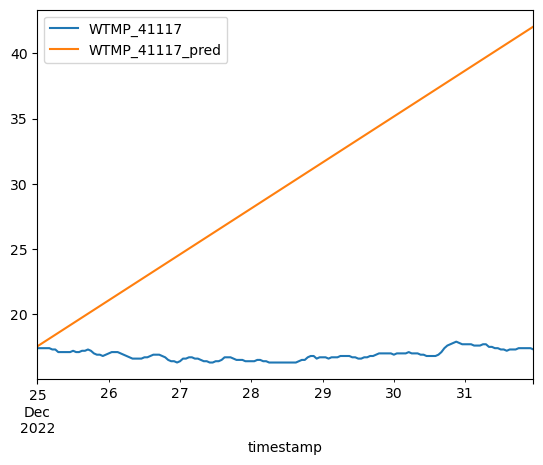

In [43]:
evaluation_2.plot(kind='line')

# SAVE

In [44]:
#Save Data About executed Test:

# Pickle file

report = Experiment(
    name="Baseline",
    description="Random station, single year test, standard settings",

    stations = STATIONS,
    years = YEARS,
    nan_threshold=NAN_THRESHOLD,
    features=FEATURES,
    era5=ERA5,
    stationary_shift=STATIONARY_SHIFT,
    lag=LAG,
    n_test_hours=N_TEST_HOURS,

    stationary=STATIONARY,
    scaler=SCALER,

    model_name = MODEL_NAME,
    model=model,

    one_shot_forecast = evaluation_1,
    recursive_forecast = evaluation_2
)


# open a file for writing in binary mode
with open(f'Reports/{report.name}.pickle', 'wb') as f:
    # write the object to the file using pickle.dump()
    pickle.dump(report, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-04-28 17:04:52         1800
metadata.json                                  2023-04-28 17:04:52           64
variables.h5                                   2023-04-28 17:04:52       145576
